In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
import numpy as np

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's


In [2]:
data = pd.read_csv('./data/boston_housing.csv')

In [3]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

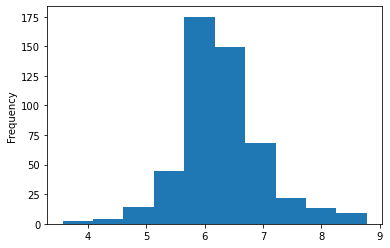

In [6]:
data.rm.plot.hist()
plt.show()

In [3]:
data.rm = data.rm.fillna(value=data.rm.mean())

<Figure size 1440x1440 with 0 Axes>

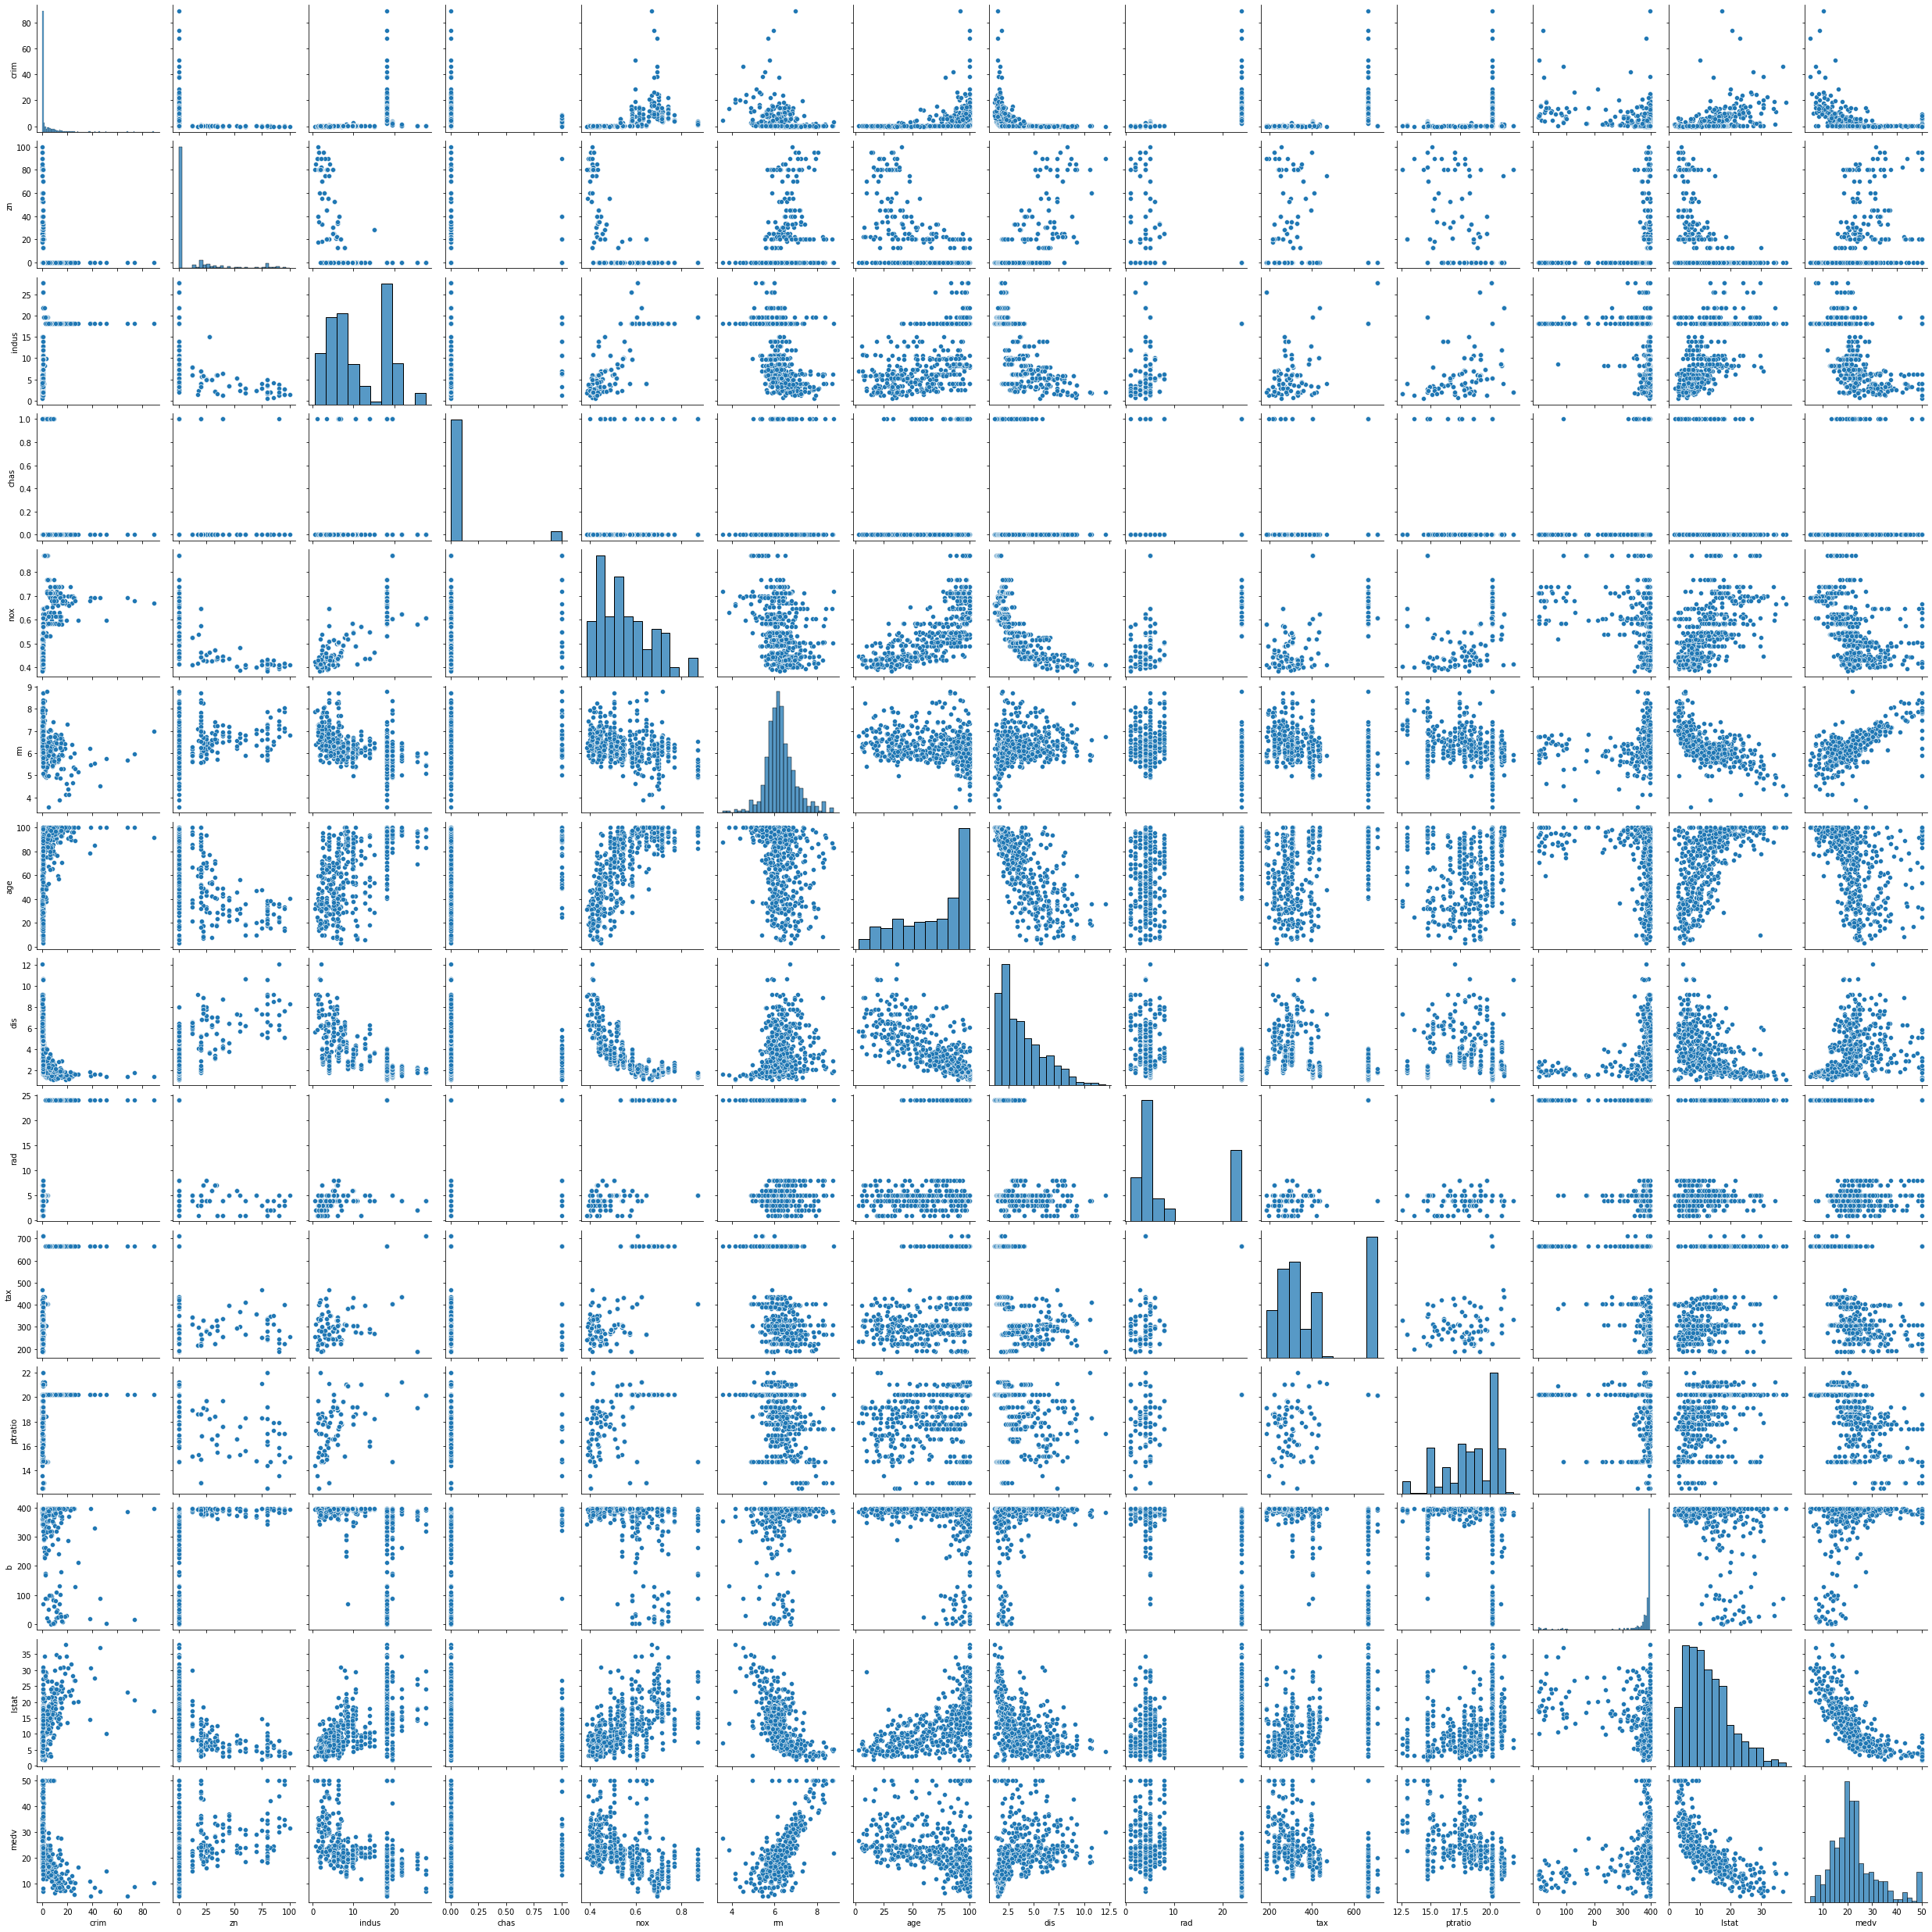

In [8]:
plt.figure(figsize=(20, 20))
sns.pairplot(data)
plt.show()

In [4]:
X, Y = data.drop(columns='medv'), data['medv']

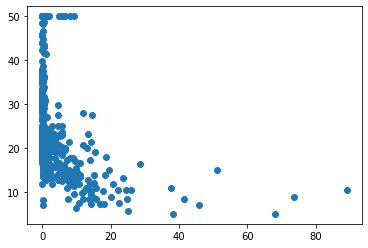

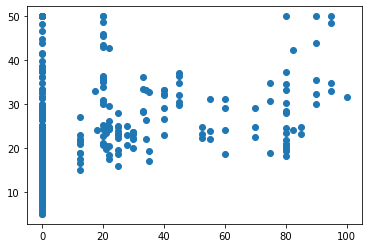

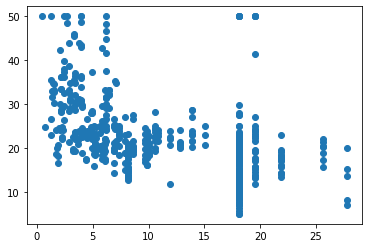

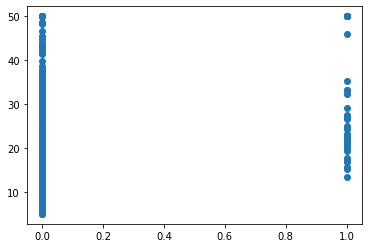

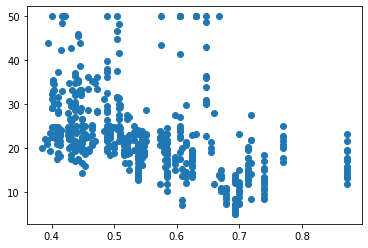

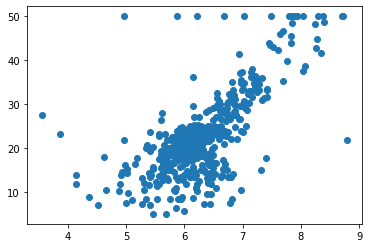

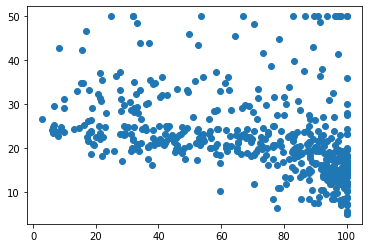

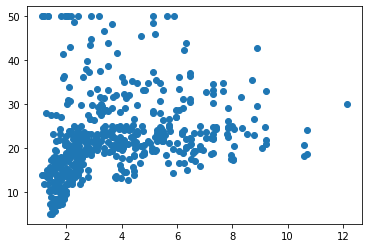

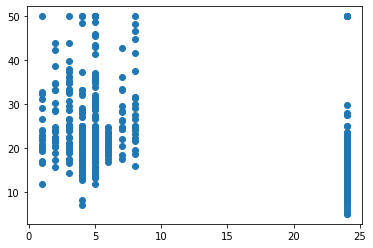

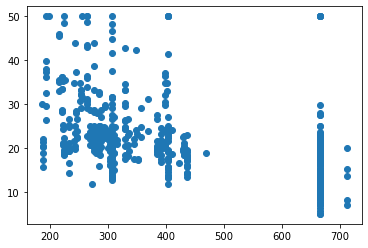

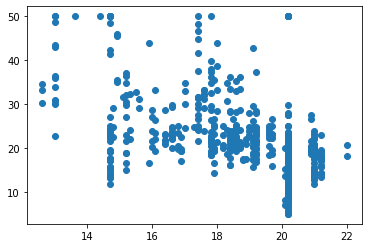

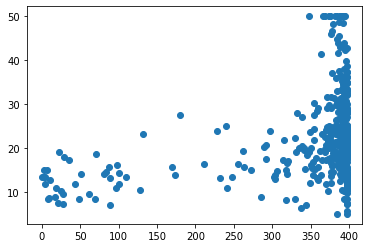

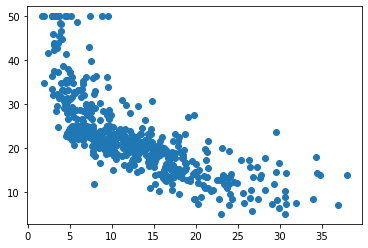

In [10]:
for col in X.columns:
    plt.scatter(X[col], Y)
    plt.show()

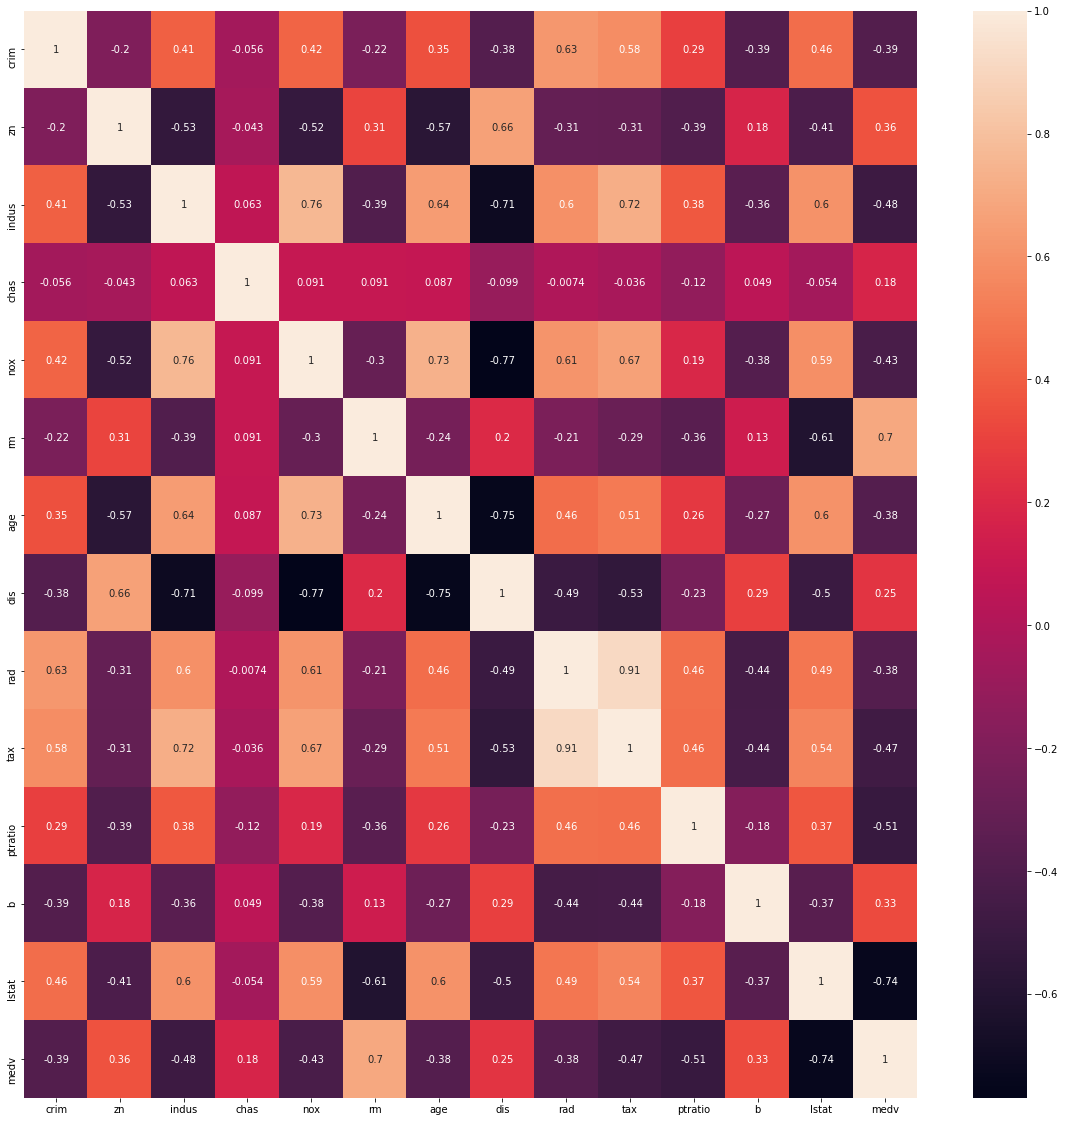

In [11]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True)
plt.show()

## Choose features which are not correlated a lot

In [12]:
features = ['chas', 'lstat', 'b', 'ptratio', 'tax', 'dis']  # chas is categorical do not standardize

In [5]:
X, Y = data.drop(["medv"], axis=1), data['medv']

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [7]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
361,3.83684,0.0,18.10,0,0.770,6.251,91.1,2.2955,24,666,20.2,350.65,14.19
383,7.99248,0.0,18.10,0,0.700,5.520,100.0,1.5331,24,666,20.2,396.90,24.56
402,9.59571,0.0,18.10,0,0.693,6.404,100.0,1.6390,24,666,20.2,376.11,20.31
209,0.43571,0.0,10.59,1,0.489,5.344,100.0,3.8750,4,277,18.6,396.90,23.09
481,5.70818,0.0,18.10,0,0.532,6.750,74.9,3.3317,24,666,20.2,393.07,7.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0.13642,0.0,10.59,0,0.489,5.891,22.3,3.9454,4,277,18.6,396.90,10.87
458,7.75223,0.0,18.10,0,0.713,6.301,83.7,2.7831,24,666,20.2,272.21,16.23
428,7.36711,0.0,18.10,0,0.679,6.193,78.1,1.9356,24,666,20.2,96.73,21.52
443,9.96654,0.0,18.10,0,0.740,6.485,100.0,1.9784,24,666,20.2,386.73,18.85


In [12]:
X_train.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [13]:
scale = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat']

In [14]:
scaler = StandardScaler()
scaler.fit(X_train[scale])
X_train[scale] = scaler.transform(X_train[scale])
X_test[scale] = scaler.transform(X_test[scale])

In [15]:
Y_train = scaler.fit_transform(Y_train.values.reshape(-1, 1))

In [16]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [17]:
preds = model.predict(X_test)

In [18]:
preds = scaler.inverse_transform(preds)

In [19]:
mean_absolute_error(Y_test, preds), mean_squared_error(Y_test, preds), r2_score(Y_test, preds)

(3.5440892066385743, 24.35749940471345, 0.6736836543647715)

In [23]:
model.intercept_

array([-0.02086412])

In [24]:
model.coef_

array([[ 0.33716421, -0.67731328,  0.08012465, -0.22503983, -0.0421002 ,
        -0.15545404]])

In [20]:
poly_reg = PolynomialFeatures(2)
poly_reg.fit(X_train)
X_poly = poly_reg.transform(X_train)
X_test_poly = poly_reg.transform(X_test)

In [21]:
lin_reg = LinearRegression()

lin_reg.fit(X_poly, Y_train)
y_pred=lin_reg.predict(X_test_poly)

In [22]:
y_pred = scaler.inverse_transform(y_pred)

In [23]:
mean_absolute_error(Y_test, y_pred), mean_squared_error(Y_test, y_pred), r2_score(Y_test, y_pred)

(2.7691102084698516, 16.195499586088594, 0.7830296060831842)

### Multiple polynomial feature values

In [29]:
mse = []
for i in range(2, 5):
    poly_reg = PolynomialFeatures(i)
    poly_reg.fit(X_train)
    X_poly = poly_reg.transform(X_train)
    X_test_poly = poly_reg.transform(X_test)
    lin_reg = LinearRegression()

    lin_reg.fit(X_poly, Y_train)
    y_pred=lin_reg.predict(X_test_poly)
    y_pred = scaler.inverse_transform(y_pred)
    mse.append(mean_squared_error(Y_test, y_pred))

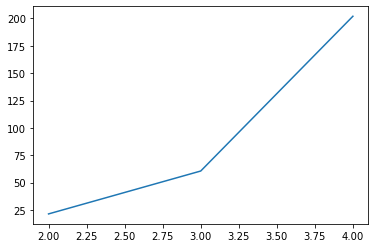

In [30]:
plt.plot(range(2, 5), mse)
plt.show()

#### Choose one with lowest error

### Visualization only, do not need to understand

In [31]:
xp, yp = zip(*sorted(zip([arr[1] for arr in X_test.values], y_pred)))

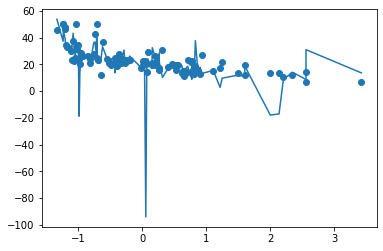

In [32]:
plt.scatter([arr[1] for arr in X_test.values], Y_test)
plt.plot(xp, yp)
plt.show()

## K-fold cross-validation

![kfold](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [36]:
scores = []
kfold = KFold(n_splits=5)
for train_index, test_index in kfold.split(X):
    X_train, Y_train = X.values[train_index], Y.values[train_index]
    X_test, Y_test = X.values[test_index], Y.values[test_index]
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    Y_train = scaler.fit_transform(Y_train.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    preds = model.predict(X_test)
    preds = scaler.inverse_transform(preds)
    scores.append(mean_squared_error(Y_test, preds))

In [37]:
scores

[16.97830505381994,
 44.63677998306758,
 50.036637334846674,
 43.976024442014655,
 30.294438826325095]

In [38]:
np.mean(scores)

37.184437128014785